[https://pythonru.com/uroki/osnovy-pandas-3-vazhnye-metody-formatirovanija-dannyh]

In [1]:
# импортируем библиотеки numpy и pandas
import numpy as np
import pandas as pd

# импортируем библиотеку datetime для работы с датами
import datetime
from datetime import datetime, date

import warnings
warnings.filterwarnings('ignore')
# Задаем некоторые опции библиотеки pandas, которые
# настраивают вывод
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 8)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 80)

# импортируем matplotlib для построения графиков
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sp500 = pd.read_csv("data/sp500.csv", 
                    index_col='Symbol', 
                    usecols=[0, 2, 3, 7])

In [3]:
sp500.head(3)

             Sector   Price  Book Value
Symbol                                 
MMM     Industrials  141.14      26.668
ABT     Health Care   39.60      15.573
ABBV    Health Care   53.95       2.954

In [4]:
# создаем копию датафрейма df
df2 = sp500.copy()
# # заменяем две ячейки с пропусками значениями 0
# df2.loc['g'].c1 = 0
# df2.loc['g'].c3 = 0
df2.head(4)

                        Sector   Price  Book Value
Symbol                                            
MMM                Industrials  141.14      26.668
ABT                Health Care   39.60      15.573
ABBV               Health Care   53.95       2.954
ACN     Information Technology   79.79       8.326

In [5]:
# создаем датафрейм с 5 строками и 3 столбцами
df = pd.DataFrame(np.arange(0, 15).reshape(5, 3), 
               index=['a', 'b', 'c', 'd', 'e'], 
               columns=['c1', 'c2', 'c3'])
df

   c1  c2  c3
a   0   1   2
b   3   4   5
c   6   7   8
d   9  10  11
e  12  13  14

In [6]:
# добавляем несколько столбцов и строк в датафрейм
# столбец c4 со значениями NaN
df['c4'] = np.nan
# строка 'f' со значениями от 15 до 18 
df.loc['f'] = np.arange(15, 19) 
# строка 'g', состоящая из значений NaN
df.loc['g'] = np.nan
# столбец 'C5', состоящий из значений NaN
df['c5'] = np.nan
# меняем значение в столбце 'c4' строки 'a'
df['c4']['a'] = 20
df

     c1    c2    c3    c4  c5
a   0.0   1.0   2.0  20.0 NaN
b   3.0   4.0   5.0   NaN NaN
c   6.0   7.0   8.0   NaN NaN
d   9.0  10.0  11.0   NaN NaN
e  12.0  13.0  14.0   NaN NaN
f  15.0  16.0  17.0  18.0 NaN
g   NaN   NaN   NaN   NaN NaN

In [7]:
# какие элементы являются значениями NaN?
df.isnull()

      c1     c2     c3     c4    c5
a  False  False  False  False  True
b  False  False  False   True  True
c  False  False  False   True  True
d  False  False  False   True  True
e  False  False  False   True  True
f  False  False  False  False  True
g   True   True   True   True  True

In [8]:
# вычисляем общее количество значений NaN
df.isnull().sum().sum()

15

In [9]:
# вычисляем количество значений, отличных от NaN,
# по каждому столбцу
df.count()

c1    6
c2    6
c3    6
c4    2
c5    0
dtype: int64

In [10]:
# какие элементы являются непропущенными значениями?
df.notnull()

      c1     c2     c3     c4     c5
a   True   True   True   True  False
b   True   True   True  False  False
c   True   True   True  False  False
d   True   True   True  False  False
e   True   True   True  False  False
f   True   True   True   True  False
g  False  False  False  False  False

In [11]:
# метод .dropna() при применении к датафрейму 
# удаляет целиком строки, в которых есть
# по крайней мере одно значение NaN
# в данном случае будут удалены все строки
df.dropna()

Empty DataFrame
Columns: [c1, c2, c3, c4, c5]
Index: []

In [12]:
# используя параметр how='all', удаляем лишь те строки,
# в которых все значения являются значениями NaN
df.dropna(how = 'all')

     c1    c2    c3    c4  c5
a   0.0   1.0   2.0  20.0 NaN
b   3.0   4.0   5.0   NaN NaN
c   6.0   7.0   8.0   NaN NaN
d   9.0  10.0  11.0   NaN NaN
e  12.0  13.0  14.0   NaN NaN
f  15.0  16.0  17.0  18.0 NaN

In [15]:
df3 = df.loc['e'].dropna(how='all')
df3

c1    12.0
c2    13.0
c3    14.0
Name: e, dtype: float64

In [47]:
zoo = pd.read_csv('data/zoo.csv', delimiter=',')
zoo

      animal  uniq_id  water_need
0   elephant     1001         500
1   elephant     1002         600
2   elephant     1003         550
3      tiger     1004         300
4      tiger     1005         320
..       ...      ...         ...
17      lion     1018         500
18      lion     1019         390
19  kangaroo     1020         410
20  kangaroo     1021         430
21  kangaroo     1022         410

[22 rows x 3 columns]

In [27]:
df10 = pd.read_csv('data/pandas_tutorial_read.csv', delimiter=';', 
	    names=['my_datetime', 'event', 'country', 'user_id', 'source', 'topic'])
df10

              my_datetime event    country     user_id   source          topic
0     2018-01-01 00:01:01  read  country_7  2458151261      SEO  North America
1     2018-01-01 00:03:20  read  country_7  2458151262      SEO  South America
2     2018-01-01 00:04:01  read  country_7  2458151263  AdWords         Africa
3     2018-01-01 00:04:02  read  country_7  2458151264  AdWords         Europe
4     2018-01-01 00:05:03  read  country_8  2458151265   Reddit  North America
...                   ...   ...        ...         ...      ...            ...
1790  2018-01-01 23:57:14  read  country_2  2458153051  AdWords  North America
1791  2018-01-01 23:58:33  read  country_8  2458153052      SEO           Asia
1792  2018-01-01 23:59:36  read  country_6  2458153053   Reddit           Asia
1793  2018-01-01 23:59:36  read  country_7  2458153054  AdWords         Europe
1794  2018-01-01 23:59:38  read  country_5  2458153055   Reddit           Asia

[1795 rows x 6 columns]

In [28]:

df10[['country', 'user_id']]

        country     user_id
0     country_7  2458151261
1     country_7  2458151262
2     country_7  2458151263
3     country_7  2458151264
4     country_8  2458151265
...         ...         ...
1790  country_2  2458153051
1791  country_8  2458153052
1792  country_6  2458153053
1793  country_7  2458153054
1794  country_5  2458153055

[1795 rows x 2 columns]

In [29]:
# Или 5 случайных строк:
df10.sample(5)

              my_datetime event    country     user_id   source          topic
980   2018-01-01 13:08:52  read  country_2  2458152241  AdWords           Asia
793   2018-01-01 10:43:06  read  country_4  2458152054   Reddit  North America
653   2018-01-01 08:55:39  read  country_2  2458151914   Reddit           Asia
1071  2018-01-01 14:28:27  read  country_5  2458152332   Reddit           Asia
66    2018-01-01 01:00:20  read  country_6  2458151327  AdWords           Asia

In [32]:
# Примечание: иногда 
# нужно получить объекты Series вместе DataFrames. Это можно сделать с помощью одного из способов:

df10.user_id
sd = df10['user_id']
type(sd)

pandas.core.series.Series

df10.head()[['country', 'user_id']]
Первая строчка выбирает первые 5 строк из набора данных. Потом она выбирает колонки «country» и «user_id».
Можно ли получить тот же результат с иной цепочкой функций? Конечно:
df10[['country', 'user_id']].head()
В этом случае сначала выбираются колонки, а потом берутся первые 5 строк. Результат такой же — порядок функций (и их исполнение) отличается.

In [33]:
df10[['country', 'user_id']].head()

     country     user_id
0  country_7  2458151261
1  country_7  2458151262
2  country_7  2458151263
3  country_7  2458151264
4  country_8  2458151265

In [40]:
# Выберите used_id , country и topic для пользователей из country_2.
# Выведите первые 5 строк!
df10[df10.country == 'country_2'][['user_id','topic', 'country']].head()

       user_id   topic    country
6   2458151267  Europe  country_2
13  2458151274  Europe  country_2
17  2458151278    Asia  country_2
19  2458151280    Asia  country_2
20  2458151281    Asia  country_2

In [37]:
# Или, чтобы было понятнее, можно разбить на несколько строк:
df10 = df10[df10.country == 'country_2']
df10_cols = df10[['user_id','topic', 'country']]
df10_cols.head()

       user_id   topic    country
6   2458151267  Europe  country_2
13  2458151274  Europe  country_2
17  2458151278    Asia  country_2
19  2458151280    Asia  country_2
20  2458151281    Asia  country_2

In [43]:
zoo_eats = pd.DataFrame([['elephant','vegetables'], ['tiger','meat'], ['kangaroo','vegetables'], ['zebra','vegetables'], ['giraffe','vegetables']], columns=['animal', 'food'])
zoo_eats.shape
zoo_eats.head()

     animal        food
0  elephant  vegetables
1     tiger        meat
2  kangaroo  vegetables
3     zebra  vegetables
4   giraffe  vegetables

In [48]:
zoo_copy = zoo.copy()
zoo_copy.head()

     animal  uniq_id  water_need
0  elephant     1001         500
1  elephant     1002         600
2  elephant     1003         550
3     tiger     1004         300
4     tiger     1005         320

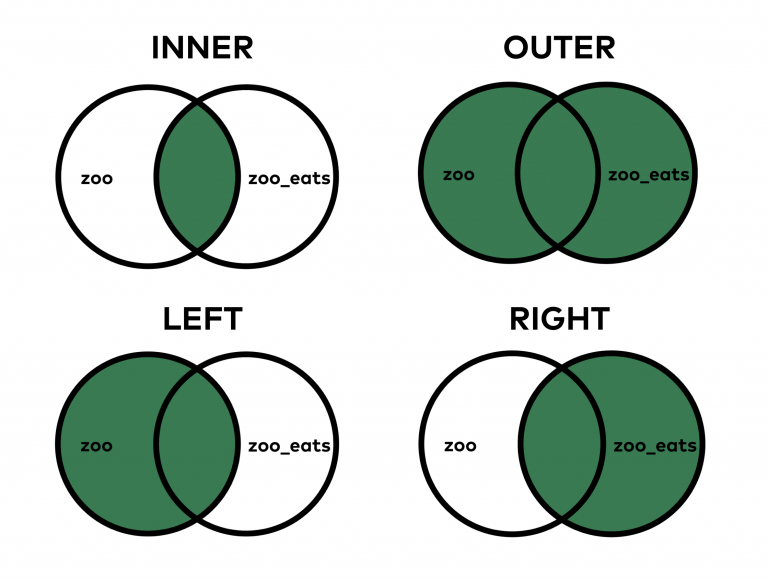

При выборе INNER JOIN (вид по умолчанию в SQL и pandas) объединяются только те значения, которые можно найти в обеих таблицах. В случае же с OUTER JOIN объединяются все значения, даже если некоторые из них есть только в одной таблице.
Конкретный пример: в zoo_eats нет значения lion. А в zoo нет значения giraffe. По умолчанию использовался метод INNER, поэтому и львы, и жирафы пропали из таблицы. Но бывают случаи, когда нужно, чтобы все значения оставались в объединенном DataFrame. Этого можно добиться следующим образом:
zoo.merge(zoo_eats, how='outer')

In [49]:
zoo_copy.merge(zoo_eats)

      animal  uniq_id  water_need        food
0   elephant     1001         500  vegetables
1   elephant     1002         600  vegetables
2   elephant     1003         550  vegetables
3      tiger     1004         300        meat
4      tiger     1005         320        meat
..       ...      ...         ...         ...
13     zebra     1014         100  vegetables
14     zebra     1015          80  vegetables
15  kangaroo     1020         410  vegetables
16  kangaroo     1021         430  vegetables
17  kangaroo     1022         410  vegetables

[18 rows x 4 columns]

In [50]:
zoo_copy.merge(zoo_eats, how='outer')

      animal  uniq_id  water_need        food
0   elephant   1001.0       500.0  vegetables
1   elephant   1002.0       600.0  vegetables
2   elephant   1003.0       550.0  vegetables
3      tiger   1004.0       300.0        meat
4      tiger   1005.0       320.0        meat
..       ...      ...         ...         ...
18      lion   1019.0       390.0         NaN
19  kangaroo   1020.0       410.0  vegetables
20  kangaroo   1021.0       430.0  vegetables
21  kangaroo   1022.0       410.0  vegetables
22   giraffe      NaN         NaN  vegetables

[23 rows x 4 columns]

Для использования merge библиотеке pandas нужны ключевые колонки, на основе которых будет проходить объединение (в случае с примером это колонка animal). Иногда pandas не сможет распознать их автоматически, и тогда нужно указать названия колонок. Для этого нужны параметры left_on и right_on.
Например, последний merge мог бы выглядеть следующим образом:
zoo.merge(zoo_eats, how = 'left', left_on='animal', right_on='animal')
Примечание: в примере pandas автоматически нашел ключевые колонки, но часто бывает так, что этого не происходит. Поэтому о left_on и right_on не стоит забывать.
Merge в pandas — довольно сложный метод, но остальные будут намного проще

In [59]:
df10 = pd.read_csv('data/pandas_tutorial_read.csv', delimiter=';', 
	    names=['my_datetime', 'event', 'country', 'user_id', 'source', 'topic'])
df10.head(3)

           my_datetime event    country     user_id   source          topic
0  2018-01-01 00:01:01  read  country_7  2458151261      SEO  North America
1  2018-01-01 00:03:20  read  country_7  2458151262      SEO  South America
2  2018-01-01 00:04:01  read  country_7  2458151263  AdWords         Africa

In [69]:
# names=['my_datetime', 'event', 'user_id', 'неизвестно_что']
blog_buy = pd.read_csv('data/pandas_tutorial_buy.csv', names=['my_datetime', 'event', 'user_id', 'amount'])
blog_buy.shape
blog_buy.head(6)
blog_buy

                               my_datetime  event  user_id  amount
0     2018-01-01 04:04:59;buy;2458151555;8    NaN      NaN     NaN
1     2018-01-01 09:28:00;buy;2458151933;8    NaN      NaN     NaN
2     2018-01-01 13:23:16;buy;2458152245;8    NaN      NaN     NaN
3   2018-01-01 14:20:43;buy;2458152315;100    NaN      NaN     NaN
4     2018-01-02 02:57:43;buy;2458153264;8    NaN      NaN     NaN
..                                     ...    ...      ...     ...
65    2018-01-07 18:44:58;buy;2458157339;8    NaN      NaN     NaN
66    2018-01-07 19:09:53;buy;2458157601;8    NaN      NaN     NaN
67    2018-01-07 20:24:35;buy;2458157193;8    NaN      NaN     NaN
68    2018-01-07 22:11:28;buy;2458157128;8    NaN      NaN     NaN
69    2018-01-07 23:58:19;buy;2458159286;8    NaN      NaN     NaN

[70 rows x 4 columns]

Набор article_read показывает всех пользователей, которые читают блог, а blog_buy — тех, купил что-то в этом блоге за период с 2018-01-01 по 2018-01-07.
Два вопроса:
Какой средний доход в период с 2018-01-01 по 2018-01-07 от пользователей из article_read?
Выведите топ-3 страны по общему уровню дохода за период с 2018-01-01 по 2018-01-07. (Пользователей из article_read здесь тоже нужно использовать).
Решение зад

In [70]:
step_1 = df10.merge(blog_buy, how='left', left_on='user_id', right_on='user_id')
step_2 = step_1.amount
step_3 = step_2.fillna(0)
result = step_3.mean()
result

0.0